<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%202/Assignment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Downloading and installing Keras, the high level  framework for DL. Here particularly we will be using Tensorflow as its backend

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing necessary libraries, functions and the mnist dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST data. The MNIST data comes ready with a split for train and test datasets

(60000, 28, 28)


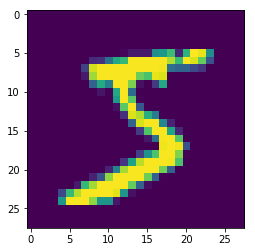

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing one of the training inputs

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping the inputs to be a one channel 28x28 image. The images stored in the MNIST dataset are flat matrices of size 28x28. Here we are converting them to 28x28x1 for them to be compatible with convolution operations we would be performing. Of course in this operation no data is lost or added.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Scaling all values to be between 0 and 255.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the ouput labels. Currently these are the numbers 0-9.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Performing one-hot encoding on the scalar labels in Y_train and Y_test.

Why do we need one-hot encoding? We need it since digit classification is a multi-class classification problem. While the digits 0-9 have an ordering between them, the classes for the digits 0-9 have no inherent ordering between them. In other words, from a classification perspective, the digits 7 and 8 are just different digits, the digit 7 is not smaller than the digit 8 and neither does their arithmetic difference have any relevance.

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

We see that the ten scalar y values we saw earlier have been converted to a vector representation using one-hot encoding.

In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(Convolution2D(1024, (3, 3), activation='relu'))
model.add(Convolution2D(2048, (3, 3), activation='relu'))
model.add(Convolution2D(10, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

Defining the model in keras

Input channel dimension: 28x28x1

Receptive fields for each layer

Layer number|Layer operation| Image size after layer | Receptive field
 --- | --- | --- | ---
1 | Convolution 32X(3x3x1) | 26x26x32 | 3x3
2 | Convolution 64X(3x3x32) | 24x24x64 |5x6
3 | Convolution 128X(3x3x64) | 22x22x128 |7x7
- | Maxpooling | 11x11x128 | 8x8
4 | Convolution 256X(3x3x128) | 9x9x256  | 10x10
5 | Convolution 512(3x3x256) | 7x7x512 | 12x12
6 | Convolution 1024X(3x3x512) | 5x5x1024 | 14x14
7 | Convolution 2048X(3x3x1024) | 3x3x2056 | 16x16
8 | Convolution 10X(3x3x2048) | 1x1x10 | 18x18
- | Flatten | 10 | -
- | Activation | 10 | -


Note:  Only convolution layers are numbered above

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Compiling the model object. 

1. loss: Decides the loss function to be minimized while finding the network's parameters
2. optimizer: Loosely speaking the optimizer decides how the parameters are changed given a particular gradient
3. metrics: Metrics that need to be evaluated while training and testing. These metrics are computed and printed purely for human evaluation. These dont change the gradient descent process in any way

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.2401 - acc: 0.1292
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==================

Fit the model on the training data. This step runs the gradient descent process

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset. The returned value is the value of the loss function when compared to the given testing labels.

In [14]:
print(score)

[2.3025851249694824, 0.098]


Printing the score

In [0]:
y_pred = model.predict(X_test)

Getting the predicted values on the testing dataset. In some ways this repeats whats done 2 cells above, except that we dont compute the loss function here.

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


Comparing the predicited and the actual labels for the first 9 images

In [0]:
model.save('kvk_assignment_2.h5')

Saving the model to disk

# Concluding remarks/What is wrong with the network?

<br> A key observation here is that the max global receptive field is 18x18, before the classification/output layer with 10 nodes. Each of these 10 nodes in the classification layer should correspond to one digit between 0 to 9. However none of these 10 classification nodes have even seen the full 28x28 pixel image. Each one of them has only seen an 18x18 pixels subset of the image. 18x18 is less than half the area of 28x28. Also each node in the classification layer sees a different 18x18 subset of the 28x28 image. One of the 10 classification nodes would see the top left section of the image, and another would see the bottom right section of the image. A node thats seeing a cropped view of the image with only the top left portion cant possibly tell if the image corresponds to a particular digit.
Its no surprise that this classifier which is seeing than half the image and that too different cropped versions of it performs poorly and has a train and test accuracy of less than 0.1%

<br>Ideally we should have built our network in a way such that the global receptive field of the classification/output layer is 28x28. In ther words each node in the output layer should have seen the full 28x28 image.

